# The Single Neuron Linear Regression Model

# 1.  Linear Regression

## - Introduction

This specific case of regression assumes that the *target values in $\mathcal{Y}$ are approximated by a linear function of the associated feature vectors*. That is, the optimal target function $f:\mathcal{X} \rightarrow \mathcal{Y}$ is assumed the be roughly a linear function. 

Many types of problems and data fall into this roughly linear relationship. For example, one could reasonably suspect that such a relationship exists when considering the iris dataset setosa species sepal length as feature measurements together with the iris dataset setosa species sepal width as targets. This can be verified by visualizing the data. Examine the figure generated by running the following code in the cell below.

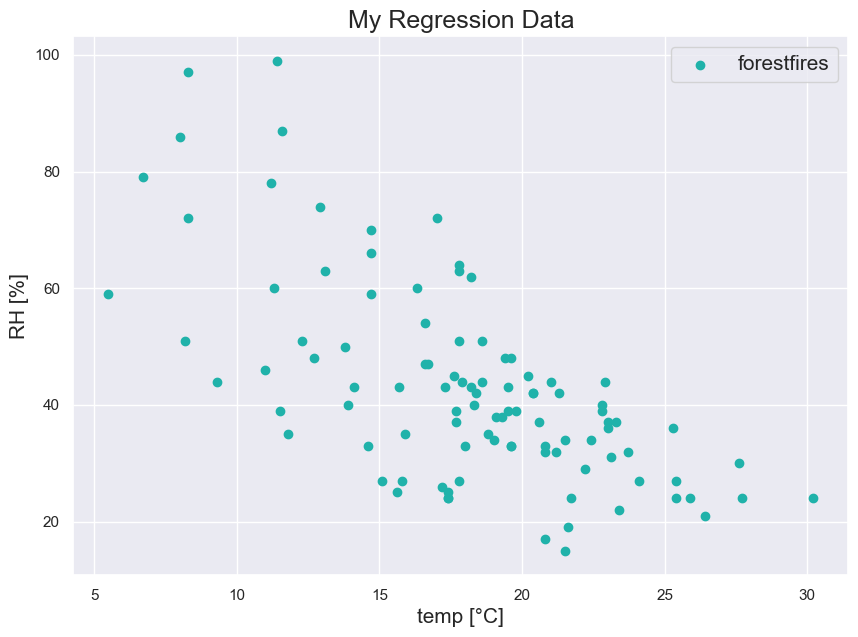

In [200]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_theme()

df = pd.read_csv("Datasets/forestfires.csv")

df = df.iloc[:100][["temp", "RH"]]
plt.figure(figsize = (10, 7))
plt.scatter(df.temp, 
            df.RH, 
            color = "lightseagreen",
            label = "forestfires")
plt.xlabel("temp [°C]", fontsize = 15)
plt.ylabel("RH [%]", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("My Regression Data", fontsize = 18)
plt.show()

# 2. Linear Regression Single Neuron Model 
---

## General ML Model:
---

Because we are assuming the target function $f:\mathcal{X} \rightarrow \mathcal{Y}$ is a **linear function of the input features**, and because we know single neuron models are good function approximators, we next build a single neuron model with a *linear-activation* activation function. Furthermore, in this model we choose the *mean-sqaured error* cost function:

$$
C(\mathbf{w}, b) = \frac{1}{2N}\sum_{i=1}^{N}\Big(\hat{y}^{(i)} - y^{(i)}\Big)^2. 
$$

With our specific case of linear regression on the setosa iris dataset with a single feature measurment taken from sepal length data, we next construct a single neuron model with a linear activation function and the mean-sqaured error cost function as depicted in the figure below.

---

## Minimize the Cost Function $C(w_1, b)$

Before defining a custom ```SingleNeuron``` class, we first need first discuss how to minimize the neurons cost function. More specifically, we wish to solve the following optimization problem:

$$
\min_{w_1, b}C(w_1, b)
$$

Since $C(w_1, b)$ is a differentiable function of both $w_1$ and $b$, we may attempt to solve this minimization problem by applying the gradient descent algorithm:

$$
w_1 \leftarrow w_1 - \alpha \frac{\partial C}{\partial w_1}
$$

$$
b \leftarrow b - \alpha \frac{\partial C}{\partial b}
$$

### - Finding the Partial Derivatives of $C(w_1, b)$ 
In order to implement the gradient descent method we first need to understand how the partial derivatives of $C(w_1, b)$ are calculated over the training data at hand. With this in mind, suppose for now that we are calculating the mean-sqaured error cost function on a *single example* example of data, i.e., $N = 1$. For this single example we observe that the mean-sqaured error cost function becomes: 

$$
C(w, b; \mathbf{x}^{(i)}, y^{(i)}) = \frac{1}{2}\Big(\hat{y}^{(i)} - y^{(i)}\Big)^2. 
$$

In the case of a linear activation function, it is important to note that $\hat{y}^{(i)}$ is a very simple function of both $w_1$ and $b$. More specifically, we observe:

$$
\hat{y}^{(i)} = a = z = w_1x^{(i)} + b. 
$$

Thus, we may rewrite our neuron cost function with a single observation:

$$
C(w, b; \mathbf{x}^{(i)}, y^{(i)}) = \frac{1}{2}\Big(w_1x^{(i)} + b - y^{(i)}\Big)^2. 
$$

With this equation, we can calculate $\partial C/ \partial w_1$ and $\partial C/ \partial b$ easily by applying the chain rule. The resulting partial derivatives with respect to $w_1$ and $b$ shown by the following equations:

1. $\frac{\partial C(w_1, b; \mathbf{x}^{(i)}, y^{(i)})}{\partial w_1} = (w_1x^{(i)} + b - y^{(i)})x^{(i)} = (\hat{y}^{(i)} - y^{(i)})x^{(i)}$
2. $\frac{\partial C(w_1, b; \mathbf{x}^{(i)}, y^{(i)})}{\partial b} = (w_1x^{(i)} + b - y^{(i)}) = (\hat{y}^{(i)} - y^{(i)})$

Understanding the different ways in which we may calculate the partial derivatives of our cost function is essential in applying any *first-order* minimization technique on the cost function $C(w_1, b)$. With what follows we discuss two of the three fundamental methods used to accomplish this goal. 


### - Different Flavors of First-Order Minimization 
When considering a single instance of data, we easily calculated $\frac{\partial C}{\partial w_1}$ and $\frac{\partial C}{\partial b}$ by applying the chain-rule. This notion can now be extended to all data used in training by summing the gradients calculated at entry of data. We will refer to this process as calculating the **full gradient** (or **full partial derivatives**) with respect to the training data: 

1. $\frac{\partial C(w_1, b; \mathbf{X}, y)}{\partial w_1} = \frac{1}{N}\sum_{i=1}^{N}\Big(\hat{y}^{(i)} - y^{(i)}\Big)x^{(i)}$
2. $\frac{\partial C(w_1, b; \mathbf{X}, y)}{\partial b} = \frac{1}{N}\sum_{i=1}^{N}\Big(\hat{y}^{(i)} - y^{(i)}\Big)$

Calculating the full gradient with respect to all training data and applying the gradient descent algorithm is called **batch gradient descent**.

**Flavor 1. Batch Gradient Descent Algorithm:**
1. For each epoch **do**
2. Calculate the full gradient by finding $\frac{\partial C(w_1, b; \mathbf{X}, y)}{\partial w_1}$ and $\frac{\partial C(w_1, b; \mathbf{X}, y)}{\partial b}$.
3. $w \leftarrow w - \alpha \frac{\partial C(w_1, b; \mathbf{X}, y)}{\partial w_1}$
4. $b \leftarrow b - \alpha \frac{\partial C(w_1, b; \mathbf{X}, y)}{\partial b}$

Applying batch gradient descent will work. However, *this method can be very slow and use a lot of memory*, especially when the number of training data is very large (possibly millions). More importantly, **batch gradient descent is not necessary to find local minima**. 

The most common way work around for this problem is to update $w_1$ and $b$ by calculating the gradient with respect to one entry of data at a time. This technique is called **stochastic gradient descent** and is one of the primary tools in training deep neural networks and simple single neuron models.  

**Flavor 2. Stochastic Gradient Descent Algorithm:**
1. For each epoch **do**
2. For $i = 1, \dots, N$ **do**
3. Calculate $\frac{\partial C(w_1, b; \mathbf{x}^{(i)}, y^{(i)})}{\partial w_1}$ and $\frac{\partial C(\partial C(w_1, b; \mathbf{x}^{(i)}, y^{(i)}))}{\partial b}$.
2. $w \leftarrow w - \alpha \frac{\partial C(w_1, b; \mathbf{x}^{(i)}, y^{(i)})}{\partial w_1}$
3. $b \leftarrow b - \alpha \frac{\partial C(w_1, b; \mathbf{x}^{(i)}, y^{(i)})}{\partial b}$

In [115]:
class SingleNeuron(object):
    
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                error = (self.predict(xi) - target)
                self.w_[:-1] -= alpha*error*xi
                self.w_[-1] -= alpha*error
                errors += .5*(error**2)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)

In [116]:
X = df.temp.values
X = X.reshape(-1, 1)
y = df.RH.values

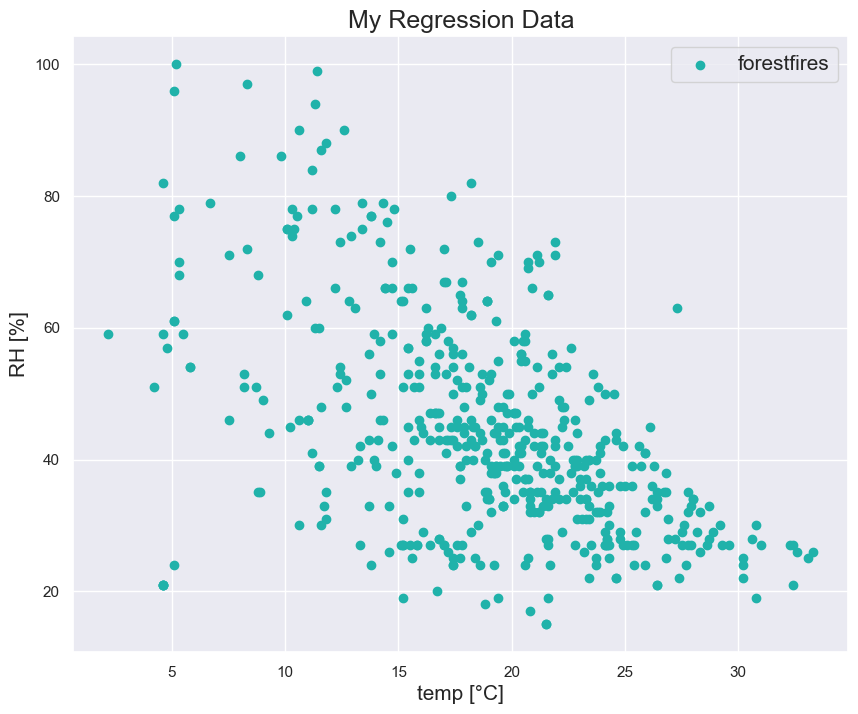

In [117]:
plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen", label = "forestfires")
plt.xlabel("temp [°C]", fontsize = 15)
plt.ylabel("RH [%]", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("My Regression Data", fontsize = 18)
plt.show()

In [142]:
def linear_activation(z):
    return z

node = SingleNeuron(linear_activation)
node.train(X, y, alpha = 0.0001, epochs = 500)

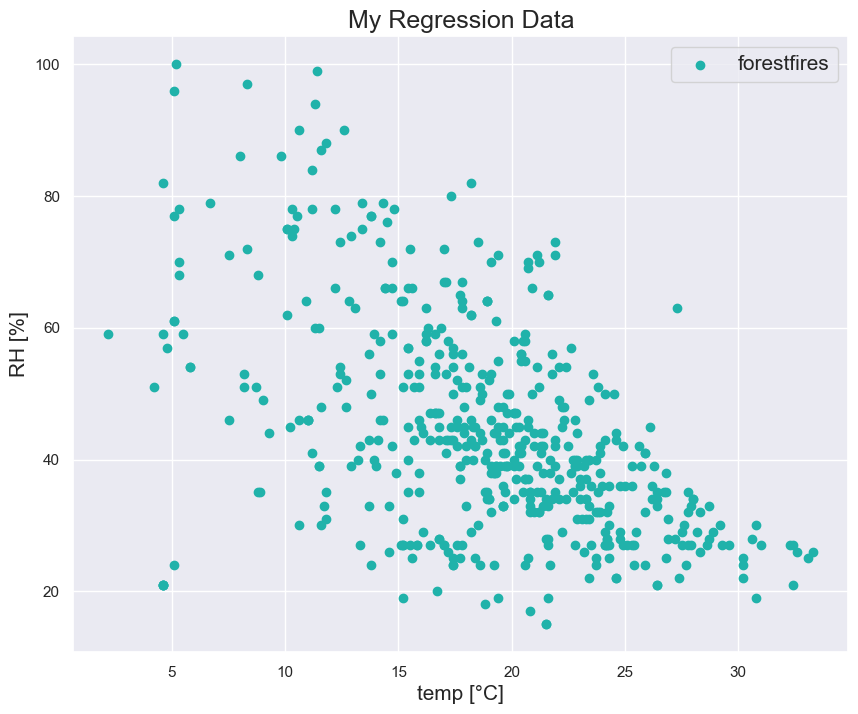

In [164]:
domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)


plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen", label = "forestfires")
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("temp [°C]", fontsize = 15)
plt.ylabel("RH [%]", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("My Regression Data", fontsize = 18)
plt.show()

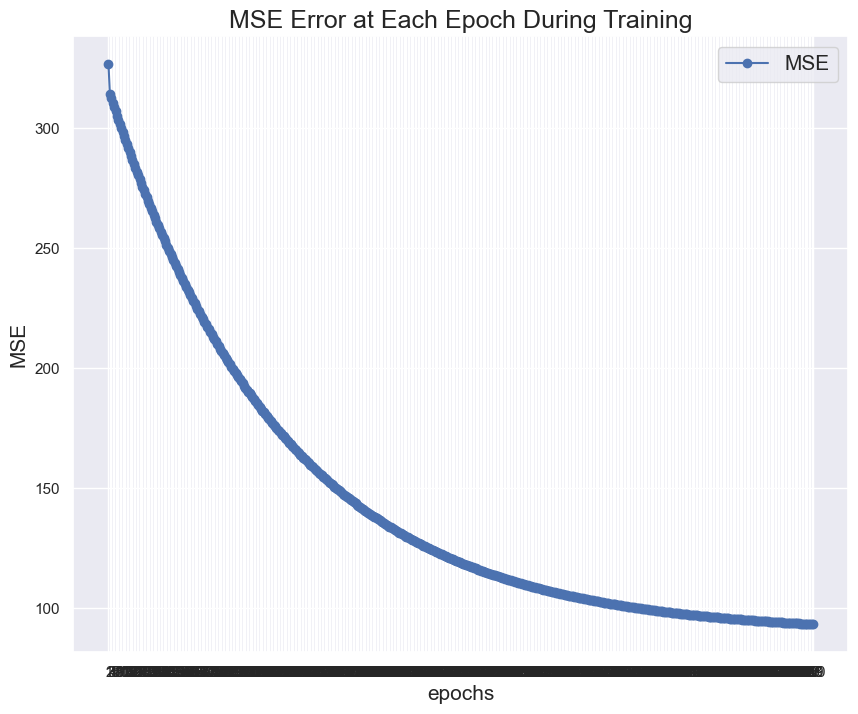

In [168]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("MSE", fontsize = 15)
plt.xticks(range(1, len(node.errors_) + 1))
plt.legend(fontsize = 15)
plt.title("MSE Error at Each Epoch During Training", fontsize = 18)
plt.show()

Text(0.5, 1.0, 'MSE Error at Each Epoch During Training')

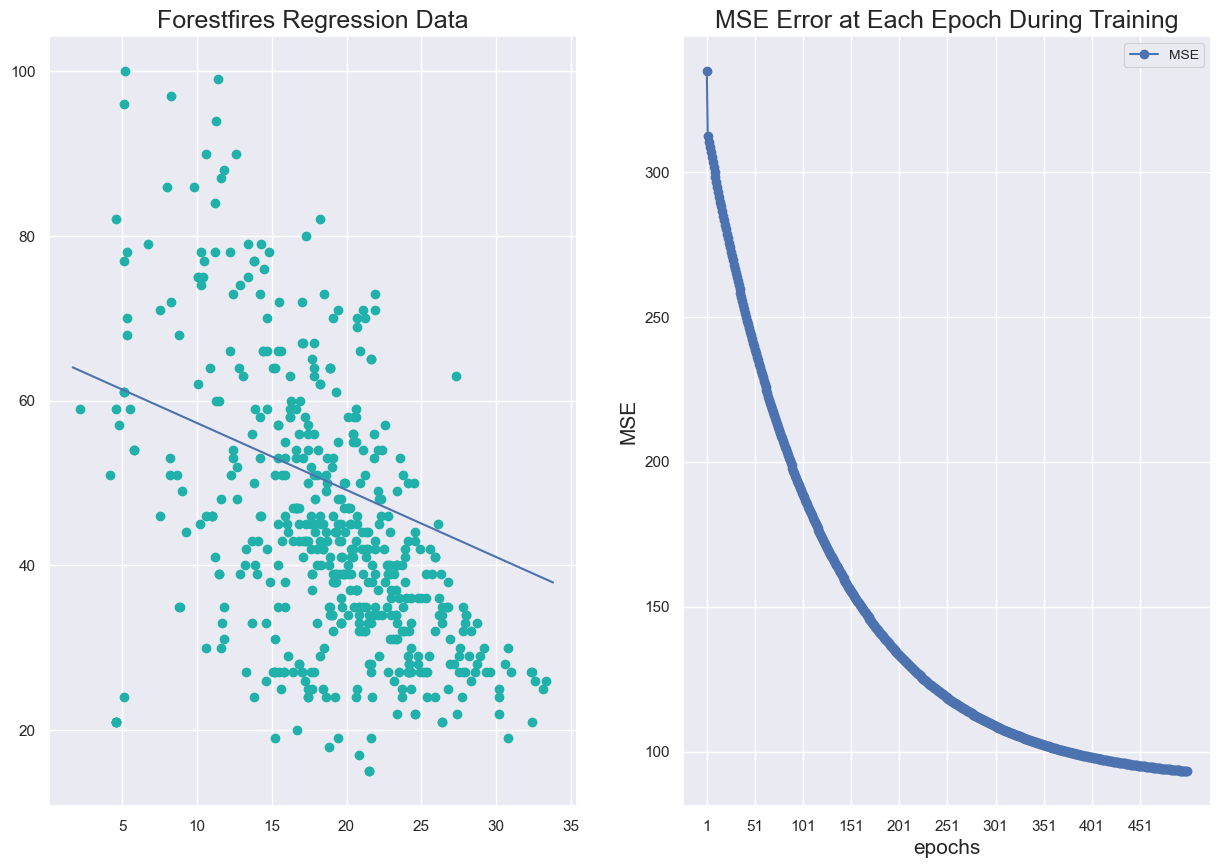

In [199]:
node = SingleNeuron(linear_activation)
node.train(X, y, alpha = .0001, epochs = 500)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(X, y, color = "lightseagreen")
ax1.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("MSE", fontsize = 15)
ax1.set_title("Forestfires Regression Data", fontsize = 18)

ax2.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(node.errors_) + 1, 50))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)

# 3. Experiment with the Learning Rate

C:\Users\XYL0713\AppData\Local\Temp\ipykernel_76332\1545812759.py:17: RuntimeWarning: overflow encountered in double_scalars
  errors += .5*(error**2)
C:\Users\XYL0713\AppData\Local\Temp\ipykernel_76332\1545812759.py:15: RuntimeWarning: invalid value encountered in subtract
  self.w_[:-1] -= alpha*error*xi
C:\Users\XYL0713\AppData\Local\Temp\ipykernel_76332\1545812759.py:16: RuntimeWarning: invalid value encountered in double_scalars
  self.w_[-1] -= alpha*error


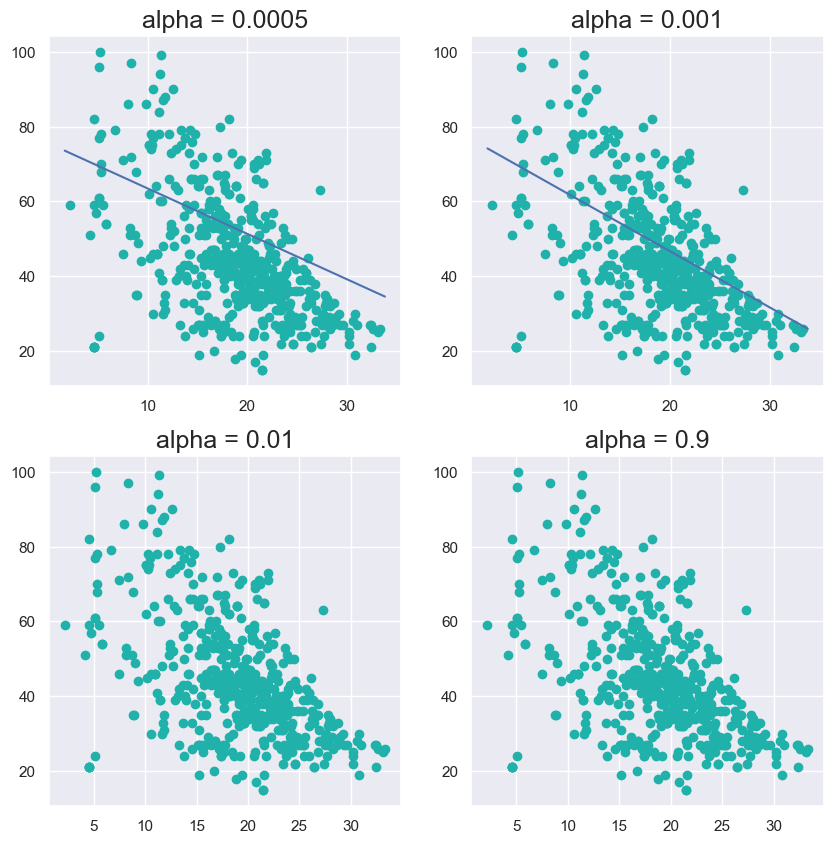

In [161]:
# Possible choices of learning rate 
alphas = [0.0005, 0.001, 0.01, 0.9]

domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)

# Call the subplots method for plotting a grid of figures
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    node = SingleNeuron(linear_activation)
    node.train(X, y, alpha = alpha, epochs = 500)
    ax.plot(domain, node.predict(domain.reshape(-1, 1)))
    ax.scatter(X, y, color = "lightseagreen")
    ax.set_title(f"alpha = {alpha}", fontsize = 18)